# 1.1.1.2 Black-Scholes-Merton Model

## Partial Differential Equation
The Black-Scholes-Merton (BSM) model is a mathematical framework used to price options and other derivative securities. At its core is a partial differential equation (PDE) that describes how the price of a derivative evolves over time.
The BSM PDE for the price $V(S,t)$ of an option is:
$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} = rV$$
Where:

- $S$ = underlying asset price
- $t$ = time
- $\sigma$ = volatility of the underlying asset
- $r$ = risk-free interest rate
- $V(S,t)$ = option price as a function of asset price and time

### Assumptions

1. The price of the underlying asset follows a geometric Brownian motion with constant drift and volatility
2. No arbitrage opportunities exist
3. It's possible to build a risk-free portfolio by combining the option and the underlying asset
4. Frictionless markets (no transaction costs or taxes)
5. Continuous trading is possible
6. The risk-free rate is constant and the same for all maturities
7. The underlying asset pays no dividends

The derivation uses Itô's lemma and the construction of a delta-hedged portfolio that must earn the risk-free rate in the absence of arbitrage.

## European Option Solution

### European Call Option
The analytical solution for a European call option is:

$$C(S,t) = SN(d_1) - Ke^{-r(T-t)}N(d_2)$$

### European Put Option
The analytical solution for a European put option is:

$$P(S,t) = Ke^{-r(T-t)}N(-d_2) - SN(-d_1)$$

Where:

$$d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)(T-t)}{\sigma\sqrt{T-t}}$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$


- $T$ is the expiration time (maturity date) (in years)
- $t$ is the current time (in years)

And $N(x)$ is the cumulative distribution function of the standard normal distribution:

$$N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{z^2}{2}}dz$$

### Put-Call Parity
The relationship between European put and call options with the same strike price and expiration is:

$$C + Ke^{-r(T-t)} = P + S$$

This formula allows us to derive the price of a put option from a call option with the same parameters (or vice versa).

## Interpretation of the Formula
The Black-Scholes formula for a European call option can be interpreted as:

$S \cdot N(d_1)$ represents the expected benefit of receiving the stock when the option is exercised
$K e^{-r(T-t)} \cdot N(d_2)$ represents the present value of paying the strike price on the expiration date

$N(d_2)$ can be interpreted as the risk-neutral probability that the option will be exercised, while $N(d_1)$ is the delta of the option, representing the sensitivity of the option price to changes in the underlying asset price.
## Key Greeks
The "Greeks" measure the sensitivity of the option price to various parameters:
### Delta (Δ)
- **Call**: $\Delta_{\text{call}} = \frac{\partial C}{\partial S} = N(d_1)$
- **Put**: $\Delta_{\text{put}} = \frac{\partial P}{\partial S} = N(d_1) - 1 = -N(-d_1)$
- *Interpretation*: Sensitivity to changes in the underlying price

### Gamma (Γ)
- **Call**: $\Gamma_{\text{call}} = \frac{\partial^2 C}{\partial S^2} = \frac{N'(d_1)}{S\sigma\sqrt{T-t}}$
- **Put**: $\Gamma_{\text{put}} = \frac{\partial^2 P}{\partial S^2} = \frac{N'(d_1)}{S\sigma\sqrt{T-t}}$
- *Interpretation*: Rate of change of Delta (same for calls and puts)

### Theta (Θ)
- **Call**: $\Theta_{\text{call}} = \frac{\partial C}{\partial t} = -\frac{S\sigma N'(d_1)}{2\sqrt{T-t}} - rKe^{-r(T-t)}N(d_2)$
- **Put**: $\Theta_{\text{put}} = \frac{\partial P}{\partial t} = -\frac{S\sigma N'(d_1)}{2\sqrt{T-t}} + rKe^{-r(T-t)}N(-d_2)$
- *Interpretation*: Sensitivity to the passage of time

### Vega (ν)
- **Call**: $\text{Vega}_{\text{call}} = \frac{\partial C}{\partial \sigma} = S\sqrt{T-t}N'(d_1)$
- **Put**: $\text{Vega}_{\text{put}} = \frac{\partial P}{\partial \sigma} = S\sqrt{T-t}N'(d_1)$
- *Interpretation*: Sensitivity to volatility (same for calls and puts)

### Rho (ρ)
- **Call**: $\rho_{\text{call}} = \frac{\partial C}{\partial r} = K(T-t)e^{-r(T-t)}N(d_2)$
- **Put**: $\rho_{\text{put}} = \frac{\partial P}{\partial r} = -K(T-t)e^{-r(T-t)}N(-d_2)$
- *Interpretation*: Sensitivity to interest rates

Where:
- $N(x)$ is the standard normal cumulative distribution function
- $N'(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ is the standard normal probability density function
- $d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)(T-t)}{\sigma\sqrt{T-t}}$
- $d_2 = d_1 - \sigma\sqrt{T-t}$

## Limitations and Extensions
The standard BSM model has several limitations:

- Assumption of constant volatility (which doesn't match market reality)
- No consideration for dividends
- Assumes European-style options (cannot be exercised early)
- Assumes log-normal distribution of returns

Extensions to the model include:

- Merton's extension for dividend-paying stocks
- Models for American options
- Stochastic volatility models (e.g., Heston model)
- Jump-diffusion models
- Local volatility models (e.g., Dupire's model)

Despite its limitations, the Black-Scholes-Merton model remains foundational in financial mathematics and derivatives pricing, providing the conceptual framework upon which more sophisticated models are built.

In [8]:
import numpy as np
from scipy.stats import norm

def calculate_d1_d2(S, K, T, r, sigma):
    """
    Calculate d1 and d2 parameters for Black-Scholes
    """
    if sigma <= 0 or T <= 0:
        raise ValueError("Volatility and time to maturity must be positive")
        
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes price for a European call option.
    
    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity in years
    r : float
        Risk-free interest rate (annual)
    sigma : float
        Volatility of the underlying asset (annual)
    
    Returns:
    float : Option price
    """
    # Calculate d1 and d2
    d1, d2 = calculate_d1_d2(S, K, T, r, sigma)
    
    # Calculate call option price
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate Black-Scholes price for a European put option.
    
    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity in years
    r : float
        Risk-free interest rate (annual)
    sigma : float
        Volatility of the underlying asset (annual)
    
    Returns:
    float : Option price
    """
    # Calculate d1 and d2
    d1, d2 = calculate_d1_d2(S, K, T, r, sigma)
    
    # Calculate put option price
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return put_price

def put_call_parity_check(S, K, T, r, call_price, put_price):
    """
    Check if put-call parity holds.
    
    Put-call parity: C + K*exp(-rT) = P + S
    
    Returns:
    bool: True if parity holds within a small tolerance
    """
    left_side = call_price + K * np.exp(-r * T)
    right_side = put_price + S
    
    return np.isclose(left_side, right_side, rtol=1e-5)

In [9]:
S = 100      # Stock price
K = 100      # Strike price
T = 1.0      # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.40  # Volatility

# Calculate option prices
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

# Print results
print(f"Stock Price: ${S}")
print(f"Strike Price: ${K}")
print(f"Time to Maturity: {T} years")
print(f"Risk-free Rate: {r*100}%")
print(f"Volatility: {sigma*100}%")
print(f"Call Option Price: ${call_price:.4f}")
print(f"Put Option Price: ${put_price:.4f}")

# Check put-call parity
parity_holds = put_call_parity_check(S, K, T, r, call_price, put_price)
print(f"Put-Call Parity Holds: {parity_holds}")

Stock Price: $100
Strike Price: $100
Time to Maturity: 1.0 years
Risk-free Rate: 5.0%
Volatility: 40.0%
Call Option Price: $18.0230
Put Option Price: $13.1459
Put-Call Parity Holds: True


In [5]:
def calculate_options_table():
    """Generate a table of option prices for different parameters"""
    
    print("\nOption Price Variations:")
    print("=" * 70)
    print(f"{'S':>5} {'K':>5} {'T(years)':>10} {'r':>5} {'sigma':>7} {'Call':>10} {'Put':>10}")
    print("-" * 70)
    
    # Base case
    S, K = 100, 100
    
    # Vary stock price
    for S_var in [90, 100, 110]:
        call = black_scholes_call(S_var, K, 1.0, 0.05, 0.2)
        put = black_scholes_put(S_var, K, 1.0, 0.05, 0.2)
        print(f"{S_var:5.0f} {K:5.0f} {1.0:10.2f} {0.05:5.2f} {0.2:7.2f} {call:10.4f} {put:10.4f}")
    
    # Reset S
    S = 100
    
    # Vary time to maturity
    for T_var in [0.25, 0.5, 1.0]:
        call = black_scholes_call(S, K, T_var, 0.05, 0.2)
        put = black_scholes_put(S, K, T_var, 0.05, 0.2)
        print(f"{S:5.0f} {K:5.0f} {T_var:10.2f} {0.05:5.2f} {0.2:7.2f} {call:10.4f} {put:10.4f}")
    
    # Vary volatility
    for sigma_var in [0.1, 0.2, 0.3]:
        call = black_scholes_call(S, K, 1.0, 0.05, sigma_var)
        put = black_scholes_put(S, K, 1.0, 0.05, sigma_var)
        print(f"{S:5.0f} {K:5.0f} {1.0:10.2f} {0.05:5.2f} {sigma_var:7.2f} {call:10.4f} {put:10.4f}")

calculate_options_table()


Option Price Variations:
    S     K   T(years)     r   sigma       Call        Put
----------------------------------------------------------------------
   90   100       1.00  0.05    0.20     5.0912    10.2142
  100   100       1.00  0.05    0.20    10.4506     5.5735
  110   100       1.00  0.05    0.20    17.6630     2.7859
  100   100       0.25  0.05    0.20     4.6150     3.3728
  100   100       0.50  0.05    0.20     6.8887     4.4197
  100   100       1.00  0.05    0.20    10.4506     5.5735
  100   100       1.00  0.05    0.10     6.8050     1.9279
  100   100       1.00  0.05    0.20    10.4506     5.5735
  100   100       1.00  0.05    0.30    14.2313     9.3542


In [10]:
import numpy as np
from scipy.stats import norm

def calculate_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculate option Greeks (Delta, Gamma, Vega, Theta, Rho)
    
    Parameters:
    S : float
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity in years
    r : float
        Risk-free interest rate (annual)
    sigma : float
        Volatility of the underlying asset (annual)
    option_type : str
        'call' for Call option, 'put' for Put option
        
    Returns:
    dict : Dictionary containing all Greeks
    """
    d1, d2 = calculate_d1_d2(S, K, T, r, sigma)
    
    # Probability density function for standard normal distribution
    pdf_d1 = (1 / np.sqrt(2 * np.pi)) * np.exp(-d1**2 / 2)
    
    # Calculate common terms used in multiple Greeks
    discount_factor = np.exp(-r * T)
    
    # Calculate Greeks
    if option_type.lower() == 'call':
        delta = norm.cdf(d1)
        theta = -(S * sigma * pdf_d1) / (2 * np.sqrt(T)) - r * K * discount_factor * norm.cdf(d2)
        rho = K * T * discount_factor * norm.cdf(d2) / 100  # Divided by 100 to express per 1% change in r
    elif option_type.lower() == 'put':
        delta = norm.cdf(d1) - 1
        theta = -(S * sigma * pdf_d1) / (2 * np.sqrt(T)) + r * K * discount_factor * norm.cdf(-d2)
        rho = -K * T * discount_factor * norm.cdf(-d2) / 100  # Divided by 100 to express per 1% change in r
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    # Greeks common to both call and put
    gamma = pdf_d1 / (S * sigma * np.sqrt(T))
    vega = S * np.sqrt(T) * pdf_d1 / 100  # Divided by 100 to express per 1% change in sigma
    
    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta / 365,  # Daily theta (annualized theta / 365)
        'vega': vega,
        'rho': rho
    }

# Parameters
S = 100      # Stock price
K = 100      # Strike price
T = 1.0      # Time to maturity in years
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

# Calculate option prices
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

# Calculate Greeks
call_greeks = calculate_greeks(S, K, T, r, sigma, 'call')
put_greeks = calculate_greeks(S, K, T, r, sigma, 'put')

# Print results
print(f"Stock Price: ${S}")
print(f"Strike Price: ${K}")
print(f"Time to Maturity: {T} years")
print(f"Risk-free Rate: {r*100}%")
print(f"Volatility: {sigma*100}%")
print(f"Call Option Price: ${call_price:.4f}")
print(f"Put Option Price: ${put_price:.4f}")

# Check put-call parity
parity_holds = put_call_parity_check(S, K, T, r, call_price, put_price)
print(f"Put-Call Parity Holds: {parity_holds}")

# Print Greeks
print("\nCall Option Greeks:")
for greek, value in call_greeks.items():
    print(f"{greek.capitalize()}: {value:.6f}")

print("\nPut Option Greeks:")
for greek, value in put_greeks.items():
    print(f"{greek.capitalize()}: {value:.6f}")

Stock Price: $100
Strike Price: $100
Time to Maturity: 1.0 years
Risk-free Rate: 5.0%
Volatility: 20.0%
Call Option Price: $10.4506
Put Option Price: $5.5735
Put-Call Parity Holds: True

Call Option Greeks:
Delta: 0.636831
Gamma: 0.018762
Theta: -0.017573
Vega: 0.375240
Rho: 0.532325

Put Option Greeks:
Delta: -0.363169
Gamma: 0.018762
Theta: -0.004542
Vega: 0.375240
Rho: -0.418905


In [ ]:
def calculate_options_table():
    """Generate a table of option prices for different parameters"""
    
    print("\nOption Price Variations:")
    print("=" * 70)
    print(f"{'S':>5} {'K':>5} {'T(years)':>10} {'r':>5} {'sigma':>7} {'Call':>10} {'Put':>10}")
    print("-" * 70)
    
    # Base case
    S, K = 100, 100
    
    # Vary stock price
    for S_var in [90, 100, 110]:
        call = black_scholes_call(S_var, K, 1.0, 0.05, 0.2)
        put = black_scholes_put(S_var, K, 1.0, 0.05, 0.2)
        print(f"{S_var:5.0f} {K:5.0f} {1.0:10.2f} {0.05:5.2f} {0.2:7.2f} {call:10.4f} {put:10.4f}")
    
    # Reset S
    S = 100
    
    # Vary time to maturity
    for T_var in [0.25, 0.5, 1.0]:
        call = black_scholes_call(S, K, T_var, 0.05, 0.2)
        put = black_scholes_put(S, K, T_var, 0.05, 0.2)
        print(f"{S:5.0f} {K:5.0f} {T_var:10.2f} {0.05:5.2f} {0.2:7.2f} {call:10.4f} {put:10.4f}")
    
    # Vary volatility
    for sigma_var in [0.1, 0.2, 0.3]:
        call = black_scholes_call(S, K, 1.0, 0.05, sigma_var)
        put = black_scholes_put(S, K, 1.0, 0.05, sigma_var)
        print(f"{S:5.0f} {K:5.0f} {1.0:10.2f} {0.05:5.2f} {sigma_var:7.2f} {call:10.4f} {put:10.4f}")

# Run both analyses
calculate_options_table()


Option Price Variations:
    S     K   T(years)     r   sigma       Call        Put
----------------------------------------------------------------------
   90   100       1.00  0.05    0.20     5.0912    10.2142
  100   100       1.00  0.05    0.20    10.4506     5.5735
  110   100       1.00  0.05    0.20    17.6630     2.7859
  100   100       0.25  0.05    0.20     4.6150     3.3728
  100   100       0.50  0.05    0.20     6.8887     4.4197
  100   100       1.00  0.05    0.20    10.4506     5.5735
  100   100       1.00  0.05    0.10     6.8050     1.9279
  100   100       1.00  0.05    0.20    10.4506     5.5735
  100   100       1.00  0.05    0.30    14.2313     9.3542


# Greeks Sensitivity

## Why Options Are Priced Above Intrinsic Value

1. Future Uncertainty (Time Value)
   1. The stock price could move favorably before expiration
   2. More time = more potential for favorable movement
   3. This potential future value is priced into the option premium
2. Volatility Premium
   1. Higher volatility increases the chance of significant price movements
   2. This increases the probability the option will be profitable
   3. Market participants pay for this potential upside
3. Interest Rate Considerations
   1. Buying an option requires less capital than buying the stock
   2. The difference can be invested at the risk-free rate
   3. This interest rate differential is factored into option pricing
4. Risk Premium
   1. Options provide leverage and defined risk
   2. This asymmetric risk/reward profile commands a premium

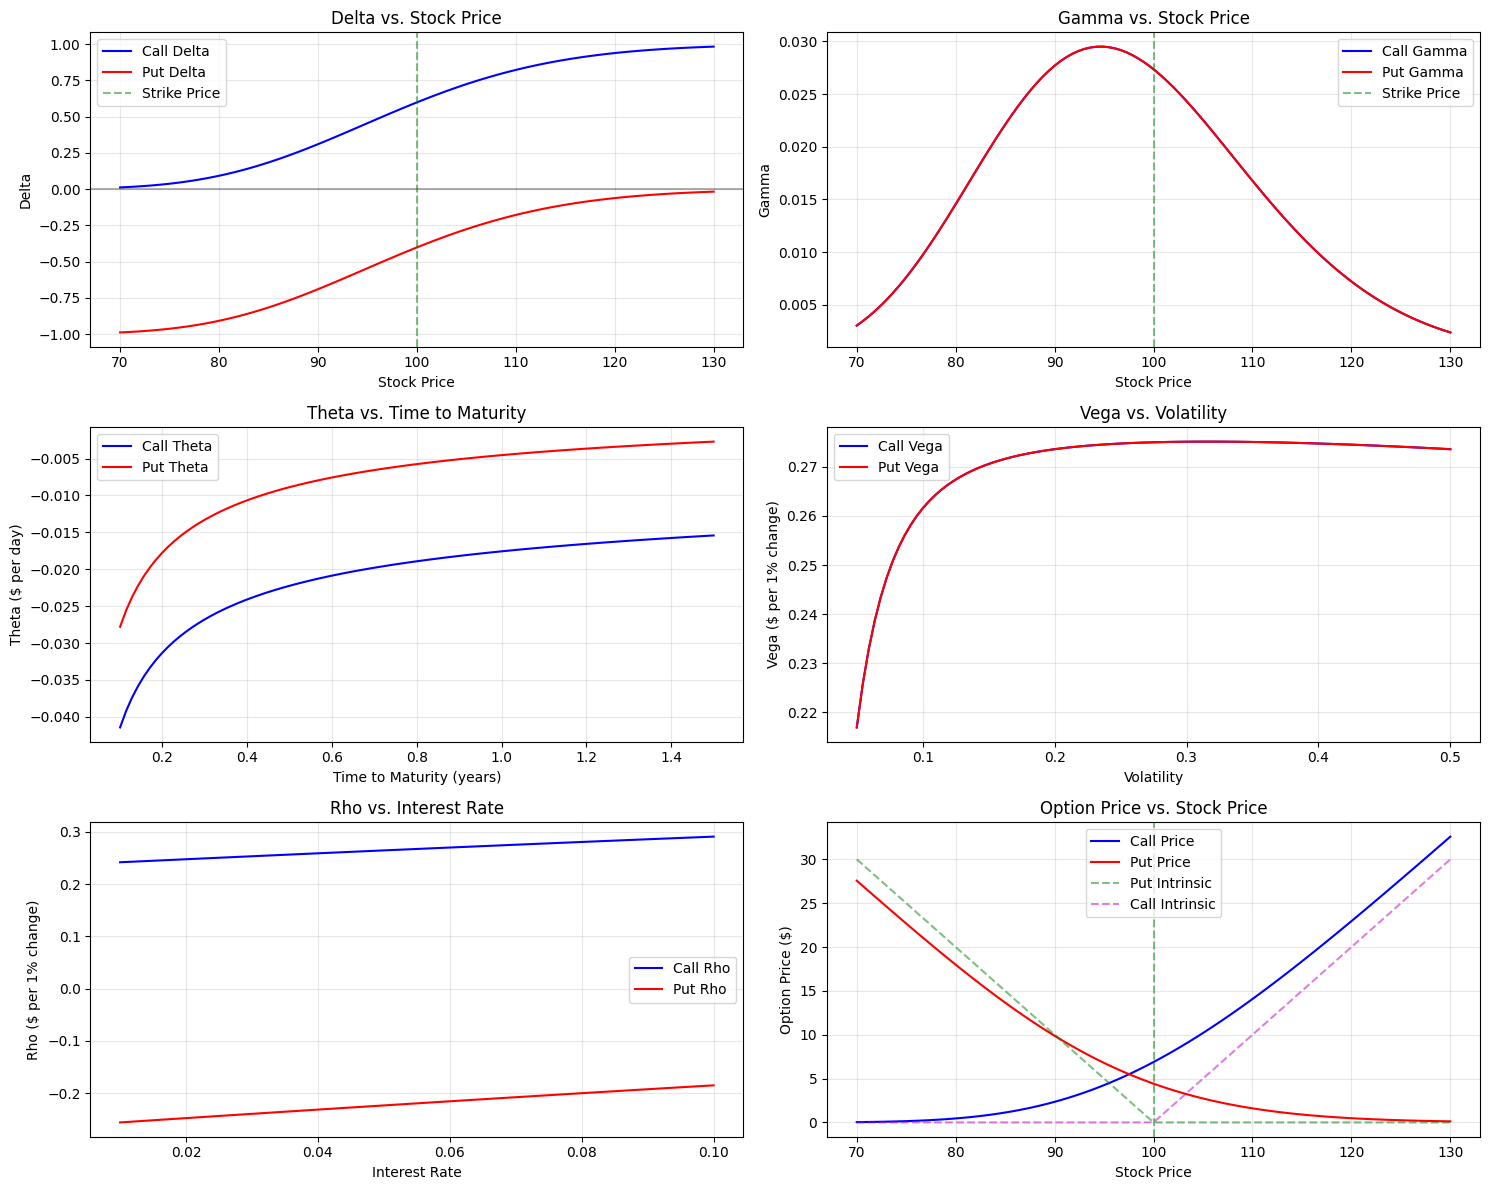

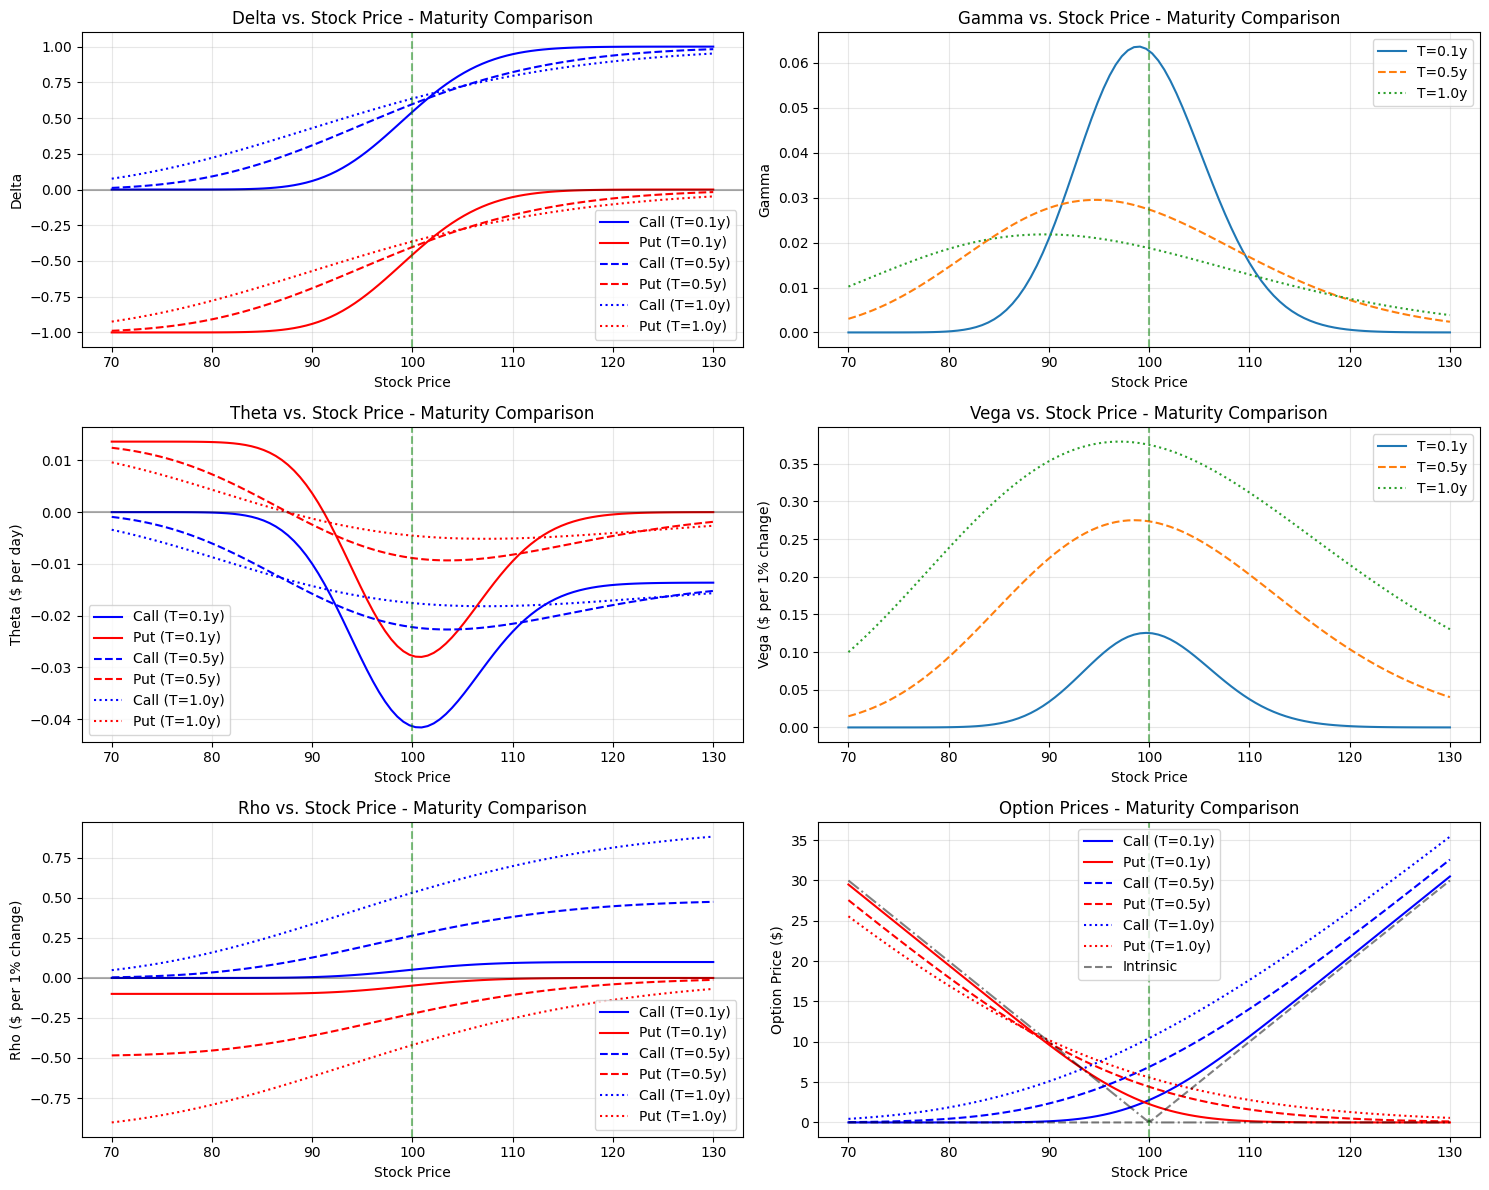

In [ ]:
def plot_greeks_sensitivity():
    """
    Function to create plots showing how Greeks change with various parameters
    """
    import matplotlib.pyplot as plt
    
    # Base parameters
    S = 100      # Stock price
    K = 100      # Strike price
    T = 0.5      # Time to maturity in years (6 months)
    r = 0.05     # Risk-free rate
    sigma = 0.2  # Volatility
    
    # Create first figure with subplots (3 rows x 2 columns)
    fig1, axs = plt.subplots(3, 2, figsize=(15, 12))
    
    # 1. Delta vs. Stock Price
    stock_prices = np.linspace(70, 130, 100)
    call_deltas = []
    put_deltas = []
    
    for S_var in stock_prices:
        call_greeks = calculate_greeks(S_var, K, T, r, sigma, 'call')
        put_greeks = calculate_greeks(S_var, K, T, r, sigma, 'put')
        call_deltas.append(call_greeks['delta'])
        put_deltas.append(put_greeks['delta'])
    
    axs[0, 0].plot(stock_prices, call_deltas, 'b-', label='Call Delta')
    axs[0, 0].plot(stock_prices, put_deltas, 'r-', label='Put Delta')
    axs[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[0, 0].axvline(x=K, color='green', linestyle='--', alpha=0.5, label='Strike Price')
    axs[0, 0].set_xlabel('Stock Price')
    axs[0, 0].set_ylabel('Delta')
    axs[0, 0].set_title('Delta vs. Stock Price')
    axs[0, 0].legend()
    axs[0, 0].grid(True, alpha=0.3)
    
    # 2. Gamma vs. Stock Price
    call_gammas = []
    put_gammas = []
    
    for S_var in stock_prices:
        call_greeks = calculate_greeks(S_var, K, T, r, sigma, 'call')
        put_greeks = calculate_greeks(S_var, K, T, r, sigma, 'put')
        call_gammas.append(call_greeks['gamma'])
        put_gammas.append(put_greeks['gamma'])
    
    axs[0, 1].plot(stock_prices, call_gammas, 'b-', label='Call Gamma')
    axs[0, 1].plot(stock_prices, put_gammas, 'r-', label='Put Gamma')
    axs[0, 1].axvline(x=K, color='green', linestyle='--', alpha=0.5, label='Strike Price')
    axs[0, 1].set_xlabel('Stock Price')
    axs[0, 1].set_ylabel('Gamma')
    axs[0, 1].set_title('Gamma vs. Stock Price')
    axs[0, 1].legend()
    axs[0, 1].grid(True, alpha=0.3)
    
    # 3. Theta vs. Time to Maturity
    times = np.linspace(0.1, 1.5, 100)  # Avoid T=0 to prevent division by zero
    call_thetas = []
    put_thetas = []
    
    for T_var in times:
        call_greeks = calculate_greeks(S, K, T_var, r, sigma, 'call')
        put_greeks = calculate_greeks(S, K, T_var, r, sigma, 'put')
        call_thetas.append(call_greeks['theta'])
        put_thetas.append(put_greeks['theta'])
    
    axs[1, 0].plot(times, call_thetas, 'b-', label='Call Theta')
    axs[1, 0].plot(times, put_thetas, 'r-', label='Put Theta')
    axs[1, 0].set_xlabel('Time to Maturity (years)')
    axs[1, 0].set_ylabel('Theta ($ per day)')
    axs[1, 0].set_title('Theta vs. Time to Maturity')
    axs[1, 0].legend()
    axs[1, 0].grid(True, alpha=0.3)
    
    # 4. Vega vs. Volatility
    vols = np.linspace(0.05, 0.5, 100)
    call_vegas = []
    put_vegas = []
    
    for sigma_var in vols:
        call_greeks = calculate_greeks(S, K, T, r, sigma_var, 'call')
        put_greeks = calculate_greeks(S, K, T, r, sigma_var, 'put')
        call_vegas.append(call_greeks['vega'])
        put_vegas.append(put_greeks['vega'])
    
    axs[1, 1].plot(vols, call_vegas, 'b-', label='Call Vega')
    axs[1, 1].plot(vols, put_vegas, 'r-', label='Put Vega')
    axs[1, 1].set_xlabel('Volatility')
    axs[1, 1].set_ylabel('Vega ($ per 1% change)')
    axs[1, 1].set_title('Vega vs. Volatility')
    axs[1, 1].legend()
    axs[1, 1].grid(True, alpha=0.3)
    
    # 5. Rho vs. Interest Rate
    rates = np.linspace(0.01, 0.1, 100)
    call_rhos = []
    put_rhos = []
    
    for r_var in rates:
        call_greeks = calculate_greeks(S, K, T, r_var, sigma, 'call')
        put_greeks = calculate_greeks(S, K, T, r_var, sigma, 'put')
        call_rhos.append(call_greeks['rho'])
        put_rhos.append(put_greeks['rho'])
    
    axs[2, 0].plot(rates, call_rhos, 'b-', label='Call Rho')
    axs[2, 0].plot(rates, put_rhos, 'r-', label='Put Rho')
    axs[2, 0].set_xlabel('Interest Rate')
    axs[2, 0].set_ylabel('Rho ($ per 1% change)')
    axs[2, 0].set_title('Rho vs. Interest Rate')
    axs[2, 0].legend()
    axs[2, 0].grid(True, alpha=0.3)
    
    # 6. Option Prices vs. Stock Price
    prices_calls = []
    prices_puts = []
    
    for S_var in stock_prices:
        call_price = black_scholes_call(S_var, K, T, r, sigma)
        put_price = black_scholes_put(S_var, K, T, r, sigma)
        prices_calls.append(call_price)
        prices_puts.append(put_price)
    
    axs[2, 1].plot(stock_prices, prices_calls, 'b-', label='Call Price')
    axs[2, 1].plot(stock_prices, prices_puts, 'r-', label='Put Price')
    axs[2, 1].plot(stock_prices, np.maximum(K - stock_prices, 0), 'g--', alpha=0.5, label='Put Intrinsic')
    axs[2, 1].plot(stock_prices, np.maximum(stock_prices - K, 0), 'm--', alpha=0.5, label='Call Intrinsic')
    axs[2, 1].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[2, 1].set_xlabel('Stock Price')
    axs[2, 1].set_ylabel('Option Price ($)')
    axs[2, 1].set_title('Option Price vs. Stock Price')
    axs[2, 1].legend()
    axs[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Create second figure showing maturity comparisons (3 rows x 2 columns)
    fig2, axs = plt.subplots(3, 2, figsize=(15, 12))
    maturities = [0.1, 0.5, 1.0]
    line_styles = ['-', '--', ':']
    
    # 1. Delta vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        call_deltas = []
        put_deltas = []
        
        for S_var in stock_prices:
            call_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'call')
            put_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'put')
            call_deltas.append(call_greeks['delta'])
            put_deltas.append(put_greeks['delta'])
        
        axs[0, 0].plot(stock_prices, call_deltas, 'b'+line_styles[i], label=f'Call (T={T_var}y)')
        axs[0, 0].plot(stock_prices, put_deltas, 'r'+line_styles[i], label=f'Put (T={T_var}y)')
    
    axs[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[0, 0].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[0, 0].set_xlabel('Stock Price')
    axs[0, 0].set_ylabel('Delta')
    axs[0, 0].set_title('Delta vs. Stock Price - Maturity Comparison')
    axs[0, 0].legend()
    axs[0, 0].grid(True, alpha=0.3)
    
    # 2. Gamma vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        gammas = []
        
        for S_var in stock_prices:
            call_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'call')
            gammas.append(call_greeks['gamma'])
        
        axs[0, 1].plot(stock_prices, gammas, line_styles[i], label=f'T={T_var}y')
    
    axs[0, 1].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[0, 1].set_xlabel('Stock Price')
    axs[0, 1].set_ylabel('Gamma')
    axs[0, 1].set_title('Gamma vs. Stock Price - Maturity Comparison')
    axs[0, 1].legend()
    axs[0, 1].grid(True, alpha=0.3)
    
    # 3. Theta vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        call_thetas = []
        put_thetas = []
        
        for S_var in stock_prices:
            call_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'call')
            put_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'put')
            call_thetas.append(call_greeks['theta'])
            put_thetas.append(put_greeks['theta'])
        
        axs[1, 0].plot(stock_prices, call_thetas, 'b'+line_styles[i], label=f'Call (T={T_var}y)')
        axs[1, 0].plot(stock_prices, put_thetas, 'r'+line_styles[i], label=f'Put (T={T_var}y)')
    
    axs[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[1, 0].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[1, 0].set_xlabel('Stock Price')
    axs[1, 0].set_ylabel('Theta ($ per day)')
    axs[1, 0].set_title('Theta vs. Stock Price - Maturity Comparison')
    axs[1, 0].legend()
    axs[1, 0].grid(True, alpha=0.3)
    
    # 4. Vega vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        vegas = []
        
        for S_var in stock_prices:
            call_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'call')
            vegas.append(call_greeks['vega'])
        
        axs[1, 1].plot(stock_prices, vegas, line_styles[i], label=f'T={T_var}y')
    
    axs[1, 1].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[1, 1].set_xlabel('Stock Price')
    axs[1, 1].set_ylabel('Vega ($ per 1% change)')
    axs[1, 1].set_title('Vega vs. Stock Price - Maturity Comparison')
    axs[1, 1].legend()
    axs[1, 1].grid(True, alpha=0.3)
    
    # 5. Rho vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        call_rhos = []
        put_rhos = []
        
        for S_var in stock_prices:
            call_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'call')
            put_greeks = calculate_greeks(S_var, K, T_var, r, sigma, 'put')
            call_rhos.append(call_greeks['rho'])
            put_rhos.append(put_greeks['rho'])
        
        axs[2, 0].plot(stock_prices, call_rhos, 'b'+line_styles[i], label=f'Call (T={T_var}y)')
        axs[2, 0].plot(stock_prices, put_rhos, 'r'+line_styles[i], label=f'Put (T={T_var}y)')
    
    axs[2, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[2, 0].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[2, 0].set_xlabel('Stock Price')
    axs[2, 0].set_ylabel('Rho ($ per 1% change)')
    axs[2, 0].set_title('Rho vs. Stock Price - Maturity Comparison')
    axs[2, 0].legend()
    axs[2, 0].grid(True, alpha=0.3)
    
    # 6. Option Prices vs. Stock Price for different maturities
    for i, T_var in enumerate(maturities):
        call_prices = []
        put_prices = []
        
        for S_var in stock_prices:
            call_price = black_scholes_call(S_var, K, T_var, r, sigma)
            put_price = black_scholes_put(S_var, K, T_var, r, sigma)
            call_prices.append(call_price)
            put_prices.append(put_price)
        
        axs[2, 1].plot(stock_prices, call_prices, 'b'+line_styles[i], label=f'Call (T={T_var}y)')
        axs[2, 1].plot(stock_prices, put_prices, 'r'+line_styles[i], label=f'Put (T={T_var}y)')
    
    # Add intrinsic value lines
    axs[2, 1].plot(stock_prices, np.maximum(stock_prices - K, 0), 'k--', alpha=0.5, label='Intrinsic')
    axs[2, 1].plot(stock_prices, np.maximum(K - stock_prices, 0), 'k-.', alpha=0.5)
    
    axs[2, 1].axvline(x=K, color='green', linestyle='--', alpha=0.5)
    axs[2, 1].set_xlabel('Stock Price')
    axs[2, 1].set_ylabel('Option Price ($)')
    axs[2, 1].set_title('Option Prices - Maturity Comparison')
    axs[2, 1].legend()
    axs[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    fig1.savefig('greeks.png')
    fig2.savefig('greeks_vs_maturity.png')

plot_greeks_sensitivity()